In [29]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [9]:
# Identify the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print('*'*70)

# Determine the data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)
df.info()
print('*'*70 + '\n')  # Corrected the syntax here

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Number of rows: 148654
Number of columns: 13
**********************************************************************

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 

In [15]:
# Calculate basic statistics for the salary column
salary_statistics = df['TotalPay'].describe()

# Calculate mode separately because it can have multiple values
salary_mode = df['TotalPay'].mode()

# Calculate range, standard deviation
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_std_dev = df['TotalPay'].std()

# Calculate the median of the Salary column
salary_median = df['TotalPay'].median()

# Display the results
print("\nBasic Statistics for Salary:")
print(salary_statistics)

print("\nMode of Salary:")
print(salary_mode)

print("\nRange of Salary:")
print(salary_range)

print("\nStandard Deviation of Salary:")
print(salary_std_dev)

print("\nMedian of Salary:")
print(salary_median)



Basic Statistics for Salary:
count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

Mode of Salary:
0    0.0
Name: TotalPay, dtype: float64

Range of Salary:
568213.56

Standard Deviation of Salary:
50517.00527394987

Median of Salary:
71426.60999999999


In [16]:
df.drop(columns=['Notes', 'Status'], inplace=True)


In [17]:
# Impute missing values with the mean of each respective column
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)


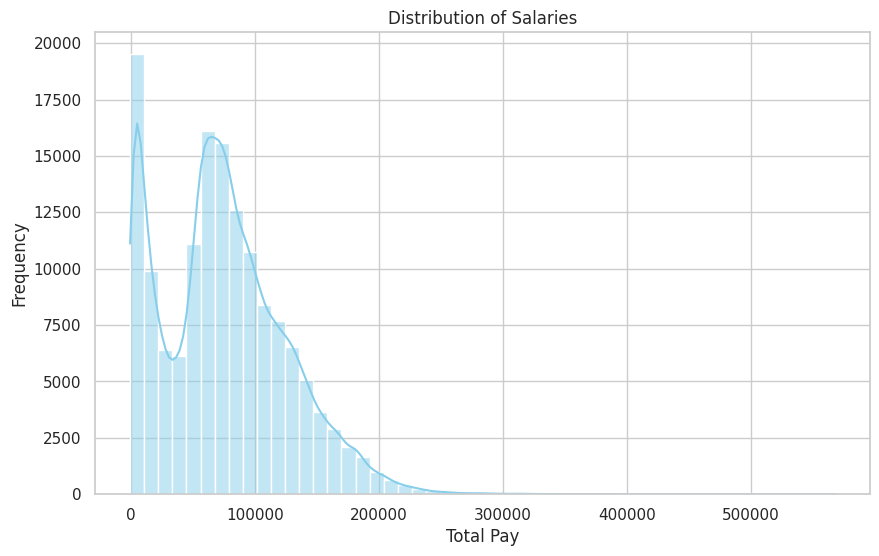

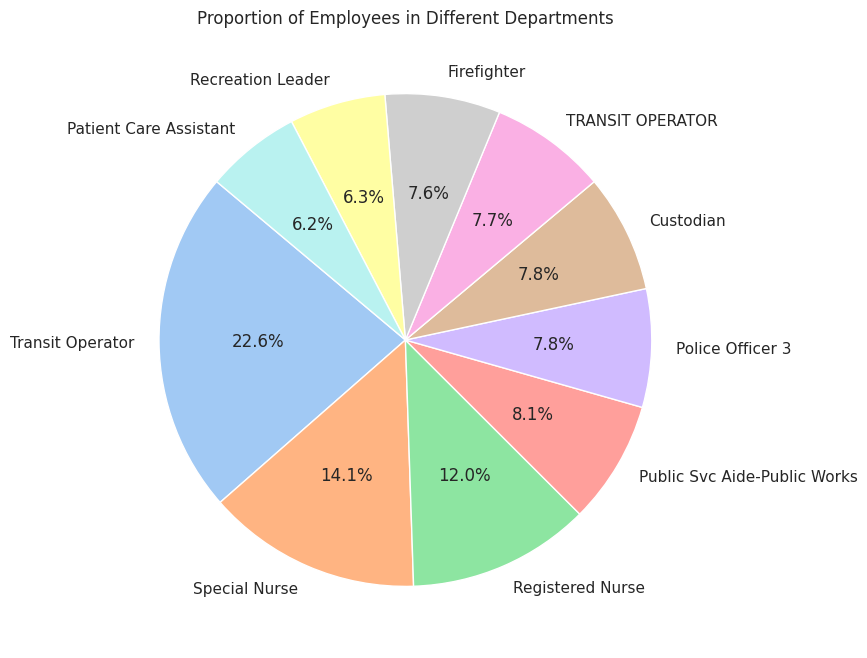

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

# Create a pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)  # Top 10 departments for illustration
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()


In [24]:
import pandas as pd

# Assuming 'JobTitle' column represents different job titles
# and 'TotalPay' column represents the total pay of employees

# Group the data by 'JobTitle' and calculate the average salary for each group
average_salary_by_job = df.groupby('JobTitle')['TotalPay'].mean().reset_index()

# Display the summary statistics for each job title
print(average_salary_by_job)


                                            JobTitle      TotalPay
0                                      ACCOUNT CLERK  44035.664337
1                                         ACCOUNTANT  47429.268000
2                                  ACCOUNTANT INTERN  29031.742917
3                        ACPO,JuvP, Juv Prob (SFERS)  62290.780000
4                                      ACUPUNCTURIST  67594.400000
...                                              ...           ...
2154                           X-RAY LABORATORY AIDE  52705.880385
2155                           X-Ray Laboratory Aide  50823.942700
2156  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000
2157                              Youth Comm Advisor  41414.307500
2158                                     ZOO CURATOR  66686.560000

[2159 rows x 2 columns]


Correlation between TotalPay and BasePay: 0.9505142922626454


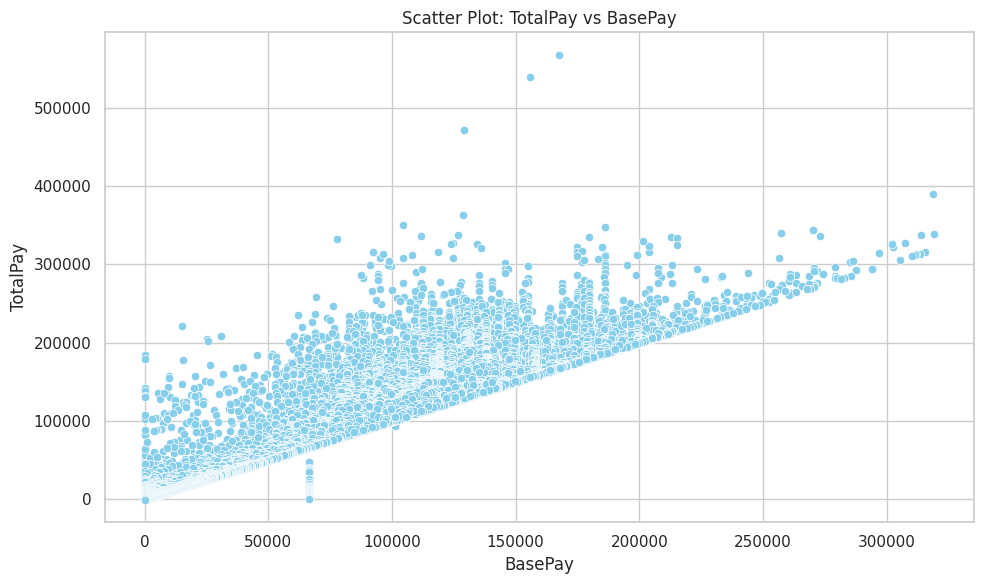

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TotalPay' and another numerical column (e.g., 'BasePay') are relevant
# You can replace 'BasePay' with the actual column name you want to analyze

# Calculate correlation between 'TotalPay' and 'BasePay'
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPay', data=df, color='skyblue')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.tight_layout()
plt.show()
